In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing Data

In [ ]:
filepath='/content/homeloan-financedata.xlsx'
customer=pd.read_excel(filepath,sheet_name='Customer')
sanction_data=pd.read_excel(filepath,sheet_name='Sanction Data')
recovery_data=pd.read_excel(filepath,sheet_name='Recovery Data')
branch=pd.read_excel(filepath,sheet_name='Branch')
channel=pd.read_excel(filepath,sheet_name='Channel')
product=pd.read_excel(filepath,sheet_name='Product')

In [ ]:
customer.head()

,Customer Number,Applied Loan Amount in Lacs,Month,Fin Year,Month Year,Channel Id,Product Id,Gender,Occupation,Age,Salary,Branch Code
0,1,6.0,1.0,2018,1-2018,2.0,2,Female,Salaried,56-63,25+,14.0
1,2,16.0,1.0,2019,1-2019,4.0,3,Male,Salaried,33-43,9 LPA - 15 LPA,5.0
2,3,2.0,4.0,2019,4-2019,1.0,2,Third Gender,Salaried,26-32,3 LPA - 5 LPA,1.0
3,4,8.0,7.0,2019,7-2019,3.0,2,Third Gender,Salaried,26-32,15 LPA - 25 LPA,7.0
4,5,24.0,9.0,2019,9-2019,3.0,4,Male,Salaried,33-43,15 LPA - 25 LPA,15.0


In [ ]:
sanction_data.head()

,Customer Number,Applied Loan Amount in Lacs,Month,Fin Year,Month Year,Sanction Amt in Lacs,Disb Amt in Lacs,SDF Branch
0,1,6,1,2018,1-2018,4.8,4.416,Gandhinagar
1,2,16,1,2019,1-2019,12.8,11.776,Bengaluru
2,3,2,4,2019,4-2019,1.9,1.748,Mumbai
3,4,8,7,2019,7-2019,7.6,6.992,Chennai
4,5,24,9,2019,9-2019,19.2,17.664,Ranchi


In [ ]:
recovery_data.head()

,Customer Number,Month,Fin Year,Month Year,Delinquency Months,Recovery Amount,Recovery Branch
0,1,1,2018,1-2018,30 Days,3.5328,Delhi
1,6,6,2017,6-2017,60 Days,9.4208,Ranchi
2,7,12,2017,12-2017,90 Days,1.3984,Shillong
3,9,9,2018,9-2018,90 Days,5.5936,Nasik
4,10,12,2017,12-2017,12 Months,14.1312,Ranchi


In [ ]:
recovery_data.rename(columns={'Recovery Branch':'Branch Name'},inplace=True)

In [ ]:
branch.head()

,Branch Code,Branch Name,Branch Latitute,Branch Longitude,Branch Pincode
0,1,Mumbai,18.987,72.836,400001
1,2,Pune,18.516,73.856,411001
2,3,Nasik,19.999,73.776,422001
3,4,Delhi,28.751,77.231,110001
4,5,Bengaluru,12.977,77.587,560001


In [ ]:
channel.head()

,Channel Id,Channels
0,1,Direct Sales Aency
1,2,Walk-In
2,3,Online
3,4,Tie Ups


Data Cleaning & Merging
  - Handle missing data, format inconsistencies, and merge all sheets appropriately
  - Convert time fields into proper datetime format for analysis


In [ ]:
customer.isnull().sum()

,0
Customer Number,0
Applied Loan Amount in Lacs,2
Month,6
Fin Year,0
Month Year,0
Channel Id,4
Product Id,0
Gender,2
Occupation,3
Age,0


In [ ]:
customer.dropna(inplace=True)

In [ ]:
customer.isnull().sum()

,0
Customer Number,0
Applied Loan Amount in Lacs,0
Month,0
Fin Year,0
Month Year,0
Channel Id,0
Product Id,0
Gender,0
Occupation,0
Age,0


In [ ]:
customer.dtypes

,0
Customer Number,int64
Applied Loan Amount in Lacs,float64
Month,float64
Fin Year,int64
Month Year,object
Channel Id,float64
Product Id,int64
Gender,object
Occupation,object
Age,object


Removing Extra Columns

In [ ]:
customer.drop(['Month','Fin Year'],axis=1,inplace=True)

In [ ]:
customer.head()

,Customer Number,Applied Loan Amount in Lacs,Month Year,Channel Id,Product Id,Gender,Occupation,Age,Salary,Branch Code
0,1,6.0,1-2018,2.0,2,Female,Salaried,56-63,25+,14.0
1,2,16.0,1-2019,4.0,3,Male,Salaried,33-43,9 LPA - 15 LPA,5.0
2,3,2.0,4-2019,1.0,2,Third Gender,Salaried,26-32,3 LPA - 5 LPA,1.0
3,4,8.0,7-2019,3.0,2,Third Gender,Salaried,26-32,15 LPA - 25 LPA,7.0
4,5,24.0,9-2019,3.0,4,Male,Salaried,33-43,15 LPA - 25 LPA,15.0


In [ ]:
sanction_data.head()

,Customer Number,Applied Loan Amount in Lacs,Month,Fin Year,Month Year,Sanction Amt in Lacs,Disb Amt in Lacs,SDF Branch
0,1,6,1,2018,1-2018,4.8,4.416,Gandhinagar
1,2,16,1,2019,1-2019,12.8,11.776,Bengaluru
2,3,2,4,2019,4-2019,1.9,1.748,Mumbai
3,4,8,7,2019,7-2019,7.6,6.992,Chennai
4,5,24,9,2019,9-2019,19.2,17.664,Ranchi


In [ ]:
for i in [customer,sanction_data,recovery_data]:
  i['Month Year']=pd.to_datetime(i['Month Year'],format='%m-%Y')

In [ ]:
customer.head()

,Customer Number,Applied Loan Amount in Lacs,Month Year,Channel Id,Product Id,Gender,Occupation,Age,Salary,Branch Code
0,1,6.0,2018-01-01,2.0,2,Female,Salaried,56-63,25+,14.0
1,2,16.0,2019-01-01,4.0,3,Male,Salaried,33-43,9 LPA - 15 LPA,5.0
2,3,2.0,2019-04-01,1.0,2,Third Gender,Salaried,26-32,3 LPA - 5 LPA,1.0
3,4,8.0,2019-07-01,3.0,2,Third Gender,Salaried,26-32,15 LPA - 25 LPA,7.0
4,5,24.0,2019-09-01,3.0,4,Male,Salaried,33-43,15 LPA - 25 LPA,15.0


In [ ]:
sanction_data.isnull().sum()

,0
Customer Number,0
Applied Loan Amount in Lacs,0
Month,0
Fin Year,0
Month Year,0
Sanction Amt in Lacs,0
Disb Amt in Lacs,0
SDF Branch,0


In [ ]:
recovery_data.isnull().sum()

,0
Customer Number,0
Month,0
Fin Year,0
Month Year,0
Delinquency Months,0
Recovery Amount,0
Branch Name,0


In [ ]:
branch.isnull().sum()

,0
Branch Code,0
Branch Name,0
Branch Latitute,0
Branch Longitude,0
Branch Pincode,0


In [ ]:
channel.isnull().sum()

,0
Channel Id,0
Channels,0


there is no null values in other datasets

Merging datasets

In [ ]:
recovery_sanction_df=pd.merge(recovery_data,sanction_data,on='Customer Number')

In [ ]:
recovery_sanction_df.head()

,Customer Number,Month_x,Fin Year_x,Month Year_x,Delinquency Months,Recovery Amount,Branch Name,Applied Loan Amount in Lacs,Month_y,Fin Year_y,Month Year_y,Sanction Amt in Lacs,Disb Amt in Lacs,SDF Branch
0,1,1,2018,2018-01-01,30 Days,3.5328,Delhi,6,1,2018,2018-01-01,4.8,4.416,Gandhinagar
1,6,6,2017,2017-06-01,60 Days,9.4208,Ranchi,12,6,2017,2017-06-01,11.4,10.488,Bhopal
2,7,12,2017,2017-12-01,90 Days,1.3984,Shillong,2,12,2017,2017-12-01,1.6,1.472,Bengaluru
3,9,9,2018,2018-09-01,90 Days,5.5936,Nasik,3,9,2018,2018-09-01,2.4,2.208,Pune
4,10,12,2017,2017-12-01,12 Months,14.1312,Ranchi,2,12,2017,2017-12-01,1.6,1.472,Pune


In [ ]:
recovery_sanction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16767 entries, 0 to 16766
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer Number              16767 non-null  int64         
 1   Month_x                      16767 non-null  int64         
 2   Fin Year_x                   16767 non-null  int64         
 3   Month Year_x                 16767 non-null  datetime64[ns]
 4   Delinquency Months           16767 non-null  object        
 5   Recovery Amount              16767 non-null  float64       
 6   Branch Name                  16767 non-null  object        
 7   Applied Loan Amount in Lacs  16767 non-null  int64         
 8   Month_y                      16767 non-null  int64         
 9   Fin Year_y                   16767 non-null  int64         
 10  Month Year_y                 16767 non-null  datetime64[ns]
 11  Sanction Amt in Lacs         16767 non-nu

In [ ]:
customer_sanc_df=pd.merge(customer,sanction_data,how='left',on='Customer Number')

In [ ]:
customer_sanc_df.head()

,Customer Number,Applied Loan Amount in Lacs_x,Month Year_x,Channel Id,Product Id,Gender,Occupation,Age,Salary,Branch Code,Applied Loan Amount in Lacs_y,Month,Fin Year,Month Year_y,Sanction Amt in Lacs,Disb Amt in Lacs,SDF Branch
0,1,6.0,2018-01-01,2.0,2,Female,Salaried,56-63,25+,14.0,6,1,2018,2018-01-01,4.8,4.416,Gandhinagar
1,2,16.0,2019-01-01,4.0,3,Male,Salaried,33-43,9 LPA - 15 LPA,5.0,16,1,2019,2019-01-01,12.8,11.776,Bengaluru
2,3,2.0,2019-04-01,1.0,2,Third Gender,Salaried,26-32,3 LPA - 5 LPA,1.0,2,4,2019,2019-04-01,1.9,1.748,Mumbai
3,4,8.0,2019-07-01,3.0,2,Third Gender,Salaried,26-32,15 LPA - 25 LPA,7.0,8,7,2019,2019-07-01,7.6,6.992,Chennai
4,5,24.0,2019-09-01,3.0,4,Male,Salaried,33-43,15 LPA - 25 LPA,15.0,24,9,2019,2019-09-01,19.2,17.664,Ranchi


In [ ]:
recovery_branch_df=pd.merge(recovery_sanction_df,branch,how='left',on='Branch Name')

In [ ]:
recovery_branch_df.head()

,Customer Number,Month_x,Fin Year_x,Month Year_x,Delinquency Months,Recovery Amount,Branch Name,Applied Loan Amount in Lacs,Month_y,Fin Year_y,Month Year_y,Sanction Amt in Lacs,Disb Amt in Lacs,SDF Branch,Branch Code,Branch Latitute,Branch Longitude,Branch Pincode
0,1,1,2018,2018-01-01,30 Days,3.5328,Delhi,6,1,2018,2018-01-01,4.8,4.416,Gandhinagar,4,28.751,77.231,110001
1,6,6,2017,2017-06-01,60 Days,9.4208,Ranchi,12,6,2017,2017-06-01,11.4,10.488,Bhopal,15,23.344,85.309,834001
2,7,12,2017,2017-12-01,90 Days,1.3984,Shillong,2,12,2017,2017-12-01,1.6,1.472,Bengaluru,13,25.578,91.893,793001
3,9,9,2018,2018-09-01,90 Days,5.5936,Nasik,3,9,2018,2018-09-01,2.4,2.208,Pune,3,19.999,73.776,422001
4,10,12,2017,2017-12-01,12 Months,14.1312,Ranchi,2,12,2017,2017-12-01,1.6,1.472,Pune,15,23.344,85.309,834001


In [ ]:
customer_sanc_df.isnull().sum()

,0
Customer Number,0
Applied Loan Amount in Lacs_x,0
Month Year_x,0
Channel Id,0
Product Id,0
Gender,0
Occupation,0
Age,0
Salary,0
Branch Code,0


In [ ]:
recovery_sanction_df.isnull().sum()

,0
Customer Number,0
Month_x,0
Fin Year_x,0
Month Year_x,0
Delinquency Months,0
Recovery Amount,0
Branch Name,0
Applied Loan Amount in Lacs,0
Month_y,0
Fin Year_y,0


Sanction vs Disbursement Efficiency
  - Calculate % of sanctioned amount vs applied amount
  - Calculate % of disbursed amount vs sanctioned amount


In [ ]:
df=sanction_data.groupby('Customer Number').agg({'Sanction Amt in Lacs':'sum','Applied Loan Amount in Lacs':'sum'}).reset_index()

In [ ]:
df

,Customer Number,Sanction Amt in Lacs,Applied Loan Amount in Lacs
0,1,4.8,6
1,2,12.8,16
2,3,1.9,2
3,4,7.6,8
4,5,19.2,24
...,...,...,...
25231,25232,1.6,2
25232,25233,13.3,14
25233,25234,22.8,24
25234,25235,6.4,8


In [ ]:
df.avg_sanction_amt=df['Sanction Amt in Lacs']/df['Applied Loan Amount in Lacs']*100

In [ ]:
df.avg_sanction_amt.rename('avg_sanction_amt')

,avg_sanction_amt
0,80.0
1,80.0
2,95.0
3,95.0
4,80.0
...,...
25231,80.0
25232,95.0
25233,95.0
25234,80.0


In [ ]:
df1=sanction_data.groupby('Customer Number').agg({'Sanction Amt in Lacs':'sum','Disb Amt in Lacs':'sum'}).reset_index()

In [ ]:
df1

,Customer Number,Sanction Amt in Lacs,Disb Amt in Lacs
0,1,4.8,4.416
1,2,12.8,11.776
2,3,1.9,1.748
3,4,7.6,6.992
4,5,19.2,17.664
...,...,...,...
25231,25232,1.6,1.472
25232,25233,13.3,12.236
25233,25234,22.8,20.976
25234,25235,6.4,5.888


In [ ]:
avg_disb_amt=df1['Disb Amt in Lacs']/df1['Sanction Amt in Lacs']*100

In [ ]:
avg_disb_amt.rename('avg_disb_amt')

,avg_disb_amt
0,92.0
1,92.0
2,92.0
3,92.0
4,92.0
...,...
25231,92.0
25232,92.0
25233,92.0
25234,92.0


Branch-Level Disbursement
  - Top 5 and bottom 5 branches by total disbursement
  - Visualize disbursement trend across branches using bar charts or maps


In [ ]:
top_5_branch=sanction_data.groupby('SDF Branch').agg({'Disb Amt in Lacs':'sum'}).sort_values('Disb Amt in Lacs',ascending=False).head(5)

In [ ]:
top_5_branch

,Disb Amt in Lacs
SDF Branch,
Mumbai,13906.352
Bengaluru,13442.212
Bhopal,13268.240
Delhi,13259.132
Gandhinagar,13209.544


<Axes: xlabel='SDF Branch', ylabel='Disb Amt in Lacs'>

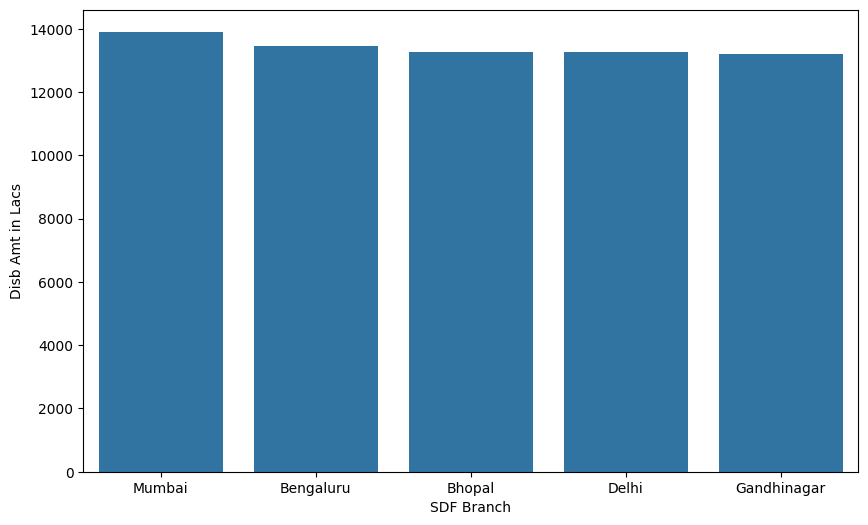

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_branch.index,y=top_5_branch['Disb Amt in Lacs'])

In [ ]:
import plotly.express as px

# Assuming 'top_5_branch' is a DataFrame with appropriate data
fig = px.bar(
    top_5_branch,
    x=top_5_branch.index,
    y='Disb Amt in Lacs',
    title='Top 5 Branches by Disbursed Amount',
    labels={'x': 'Branch', 'Disb Amt in Lacs': 'Disbursed Amount (Lacs)'},
    text='Disb Amt in Lacs',
    color='Disb Amt in Lacs',
    color_continuous_scale='Blues'
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title="Branch",
    yaxis_title="Disbursed Amount (in Lacs)",
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor='white'
)

fig.show()


In [ ]:
bottom_5_branch=sanction_data.groupby('SDF Branch').agg({'Disb Amt in Lacs':'sum'}).sort_values('Disb Amt in Lacs',ascending=False).tail(5)

In [ ]:
bottom_5_branch

,Disb Amt in Lacs
SDF Branch,
Jaipur,12893.616
Chandigarh,12787.172
Nasik,12731.144
Srinagar,12606.208
Chennai,12579.896


<Axes: xlabel='SDF Branch', ylabel='Disb Amt in Lacs'>

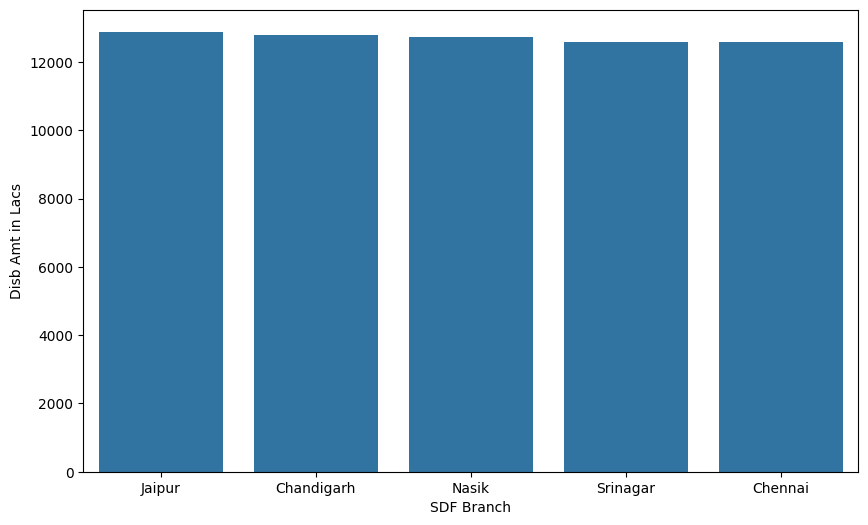

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=bottom_5_branch.index,y=bottom_5_branch['Disb Amt in Lacs'])

In [ ]:
import plotly.express as px

# Assuming bottom_5_branch is a DataFrame with the branch names in the index
fig = px.bar(
    bottom_5_branch,
    x=bottom_5_branch.index,
    y='Disb Amt in Lacs',
    title='Bottom 5 Branches by Disbursed Amount',
    labels={'x': 'Branch', 'Disb Amt in Lacs': 'Disbursed Amount (Lacs)'},
    text='Disb Amt in Lacs',
    color='Disb Amt in Lacs',
    color_continuous_scale='Reds'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title="Branch",
    yaxis_title="Disbursed Amount (in Lacs)",
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor='white'
)

fig.show()


 Recovery Performance
  - Group recovery amount by delinquency bucket (e.g., 30, 60 days)
  - Identify branches or products with low recovery rates


In [ ]:
df_recovery=recovery_data.groupby('Delinquency Months').agg({'Recovery Amount':'sum'}).reset_index()

In [ ]:
df_recovery

,Delinquency Months,Recovery Amount
0,12 Months,17701.9040
1,24 Months and more,16877.7312
2,30 Days,17941.0304
3,6 Month,17306.2304
4,60 Days,17058.1984
5,90 Days,17311.0144


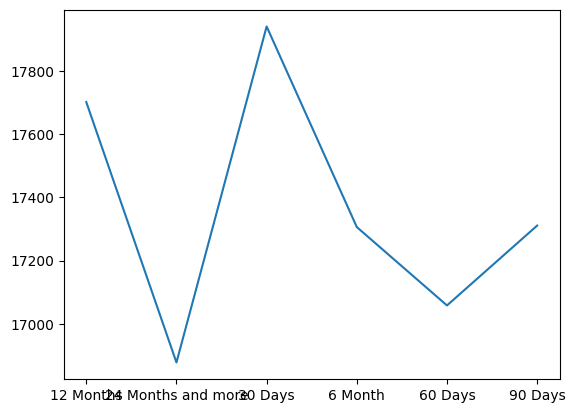

In [ ]:
plt.plot(df_recovery['Delinquency Months'],df_recovery['Recovery Amount'])

In [ ]:
import plotly.express as px

# Assuming df_recovery is your DataFrame
fig = px.line(
    df_recovery,
    x='Delinquency Months',
    y='Recovery Amount',
    title='Recovery Amount Over Delinquency Months',
    markers=True,
    labels={'Delinquency Months': 'Delinquency (Months)', 'Recovery Amount': 'Recovery Amount (₹)'},
    line_shape='spline'  # smooth curve
)

fig.update_traces(
    line=dict(color='blue', width=3),
    marker=dict(size=8, color='red', symbol='circle')
)

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    hovermode='x unified'  # one tooltip for all traces at a given x
)

fig.show()


In [ ]:
recovery_branch=recovery_data.groupby('Branch Name').agg({'Recovery Amount':'sum'}).sort_values('Recovery Amount',ascending=True)

In [ ]:
recovery_branch.head()

,Recovery Amount
Branch Name,
Ranchi,6277.1968
Bengaluru,6508.0064
Pune,6626.5760
Jaipur,6762.4416
Bhopal,6872.1792


 Channel & Product Insights
  - Analyze performance of different channels (e.g., Direct Sales)
  - Identify which products result in higher disbursement or lower recovery


In [ ]:
channel.head()

,Channel Id,Channels
0,1,Direct Sales Aency
1,2,Walk-In
2,3,Online
3,4,Tie Ups


In [ ]:
channel['Channel Id']=channel['Channel Id'].astype(float)

In [ ]:
channel.head()

,Channel Id,Channels
0,1.0,Direct Sales Aency
1,2.0,Walk-In
2,3.0,Online
3,4.0,Tie Ups


In [ ]:
customer_channel_merge=pd.merge(customer,channel,how='left',on='Channel Id')

In [ ]:
customer_channel_merge.head()

,Customer Number,Applied Loan Amount in Lacs,Month Year,Channel Id,Product Id,Gender,Occupation,Age,Salary,Branch Code,Channels
0,1,6.0,2018-01-01,2.0,2,Female,Salaried,56-63,25+,14.0,Walk-In
1,2,16.0,2019-01-01,4.0,3,Male,Salaried,33-43,9 LPA - 15 LPA,5.0,Tie Ups
2,3,2.0,2019-04-01,1.0,2,Third Gender,Salaried,26-32,3 LPA - 5 LPA,1.0,Direct Sales Aency
3,4,8.0,2019-07-01,3.0,2,Third Gender,Salaried,26-32,15 LPA - 25 LPA,7.0,Online
4,5,24.0,2019-09-01,3.0,4,Male,Salaried,33-43,15 LPA - 25 LPA,15.0,Online


In [ ]:
performence_channel=customer_channel_merge.groupby('Channels').agg({'Applied Loan Amount in Lacs':'sum'}).sort_values('Applied Loan Amount in Lacs',ascending=False)

In [ ]:
performence_channel

,Applied Loan Amount in Lacs
Channels,
Online,89314.0
Direct Sales Aency,61035.0
Walk-In,60809.0
Tie Ups,33881.0


Text(0.5, 1.0, 'Performence of Different Channels')

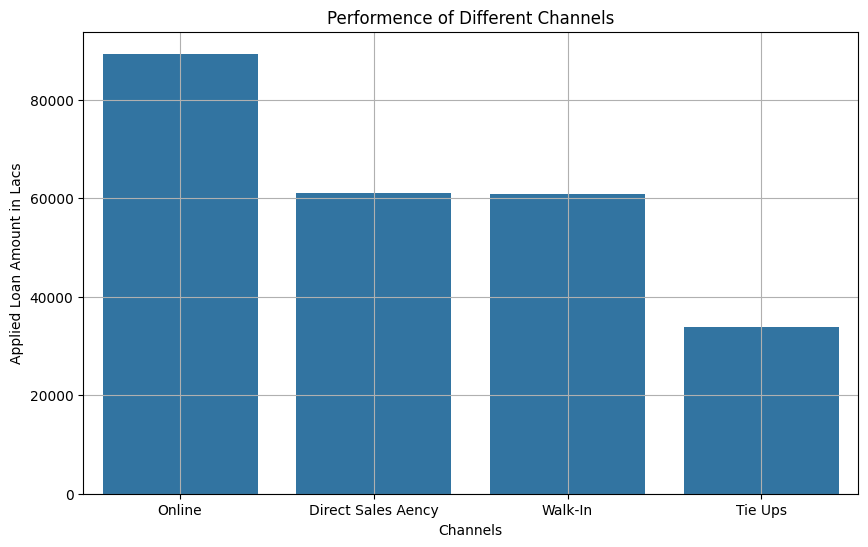

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=performence_channel.index,y=performence_channel['Applied Loan Amount in Lacs'])
plt.xlabel('Channels')
plt.ylabel('Applied Loan Amount in Lacs')
plt.grid(True)
plt.title('Performence of Different Channels')

In [ ]:
import plotly.express as px

try:
    # Ensure we have a proper DataFrame
    df = performence_channel.reset_index()
    df.columns = ['Channel', 'Applied Loan Amount in Lacs']  # Rename columns explicitly

    # Create interactive bar plot
    fig = px.bar(df,
                 x='Channel',
                 y='Applied Loan Amount in Lacs',
                 title='<b>Performance of Different Channels</b>',
                 labels={'Applied Loan Amount in Lacs': 'Applied Loan Amount (in Lacs)'},
                 color='Applied Loan Amount in Lacs',
                 color_continuous_scale='Viridis')

    # Update layout
    fig.update_layout(
        plot_bgcolor='rgba(245,245,245,1)',
        paper_bgcolor='rgba(245,245,245,1)',
        title_font=dict(size=20, color='darkblue'),
        xaxis=dict(tickangle=-45, title_font=dict(size=14, color='darkblue')),
        yaxis=dict(title_font=dict(size=14, color='darkblue'), gridcolor='LightGrey')
    )

    # Add value labels
    fig.update_traces(
        texttemplate='%{y:.1f}',
        textposition='outside',
        marker_line_color='rgb(8,48,107)',
        marker_line_width=1.5
    )

    fig.show()

except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("\nTrying alternative matplotlib version...")

    # Fallback to matplotlib/seaborn
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(12,7))
    ax = sns.barplot(x=performence_channel.index,
                    y=performence_channel['Applied Loan Amount in Lacs'],
                    palette="viridis")

    plt.title('Performance of Different Channels', fontsize=16, pad=20)
    plt.xlabel('Channels', fontsize=12)
    plt.ylabel('Applied Loan Amount (in Lacs)', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Add value labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
df3=customer_channel_merge.groupby('Product Id').agg({'Applied Loan Amount in Lacs':'sum'}).sort_values('Applied Loan Amount in Lacs',ascending=False)

In [ ]:
df3

,Applied Loan Amount in Lacs
Product Id,
2,62304.0
4,61408.0
3,61044.0
1,60283.0


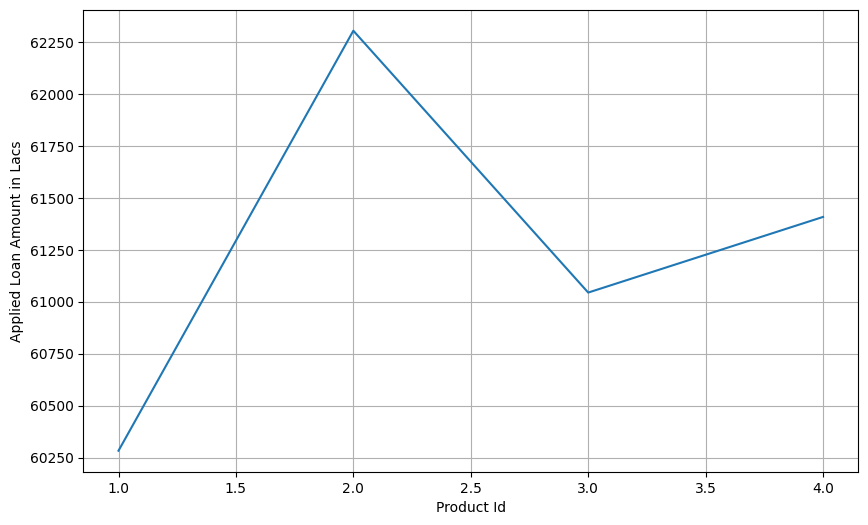

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df3.index,y=df3['Applied Loan Amount in Lacs'])
plt.xlabel('Product Id')
plt.ylabel('Applied Loan Amount in Lacs')
plt.grid(True)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df3 has 'Product ID' as index and 'Applied Loan Amount in Lacs' as column
# First, let's safely prepare the data
try:
    # Reset index to make sure we have proper columns
    plot_data = df3.reset_index()

    # Verify column names
    if 'Applied Loan Amount in Lacs' not in plot_data.columns:
        raise ValueError("Column 'Applied Loan Amount in Lacs' not found in DataFrame")

    # Create the base figure
    fig = px.line(
        plot_data,
        x=plot_data.columns[0],  # First column (previously index)
        y='Applied Loan Amount in Lacs',
        title='<b>Interactive Loan Application Trends</b>',
        labels={
            plot_data.columns[0]: 'Product ID',
            'Applied Loan Amount in Lacs': 'Amount (in Lacs)'
        },
        markers=True,
        template='plotly_white'
    )

    # Style the line
    fig.update_traces(
        line=dict(width=3, color='#4361ee'),
        marker=dict(size=8, color='#3a0ca3'),
        hovertemplate="<b>Product ID %{x}</b><br>Amount: %{y:.2f} Lacs",
        mode='lines+markers'
    )

    # Add moving average (3-period)
    fig.add_trace(
        go.Scatter(
            x=plot_data[plot_data.columns[0]],
            y=plot_data['Applied Loan Amount in Lacs'].rolling(3).mean(),
            name='3-Product Moving Avg',
            line=dict(color='#4cc9f0', dash='dot', width=2),
            hovertemplate="Avg: %{y:.2f} Lacs"
        )
    )

    # Highlight maximum value
    max_val = plot_data['Applied Loan Amount in Lacs'].max()
    max_idx = plot_data.loc[plot_data['Applied Loan Amount in Lacs'].idxmax(), plot_data.columns[0]]

    fig.add_annotation(
        x=max_idx,
        y=max_val,
        text=f"Peak: {max_val:.1f} Lacs",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        bgcolor="#f72585",
        font=dict(color="white")
    )

    # Final layout adjustments
    fig.update_layout(
        hovermode="x unified",
        xaxis=dict(
            tickangle=-45,
            showgrid=False
        ),
        yaxis=dict(
            gridcolor='lightgrey',
            zeroline=False
        ),
        plot_bgcolor='white',
        height=600,
        width=900,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    # Add range slider
    fig.update_xaxes(rangeslider_visible=True)

    fig.show()

except Exception as e:
    print(f"Error creating plot: {str(e)}")
    print("\nPlease verify your DataFrame structure:")
    print("Expected format: Index = Product IDs, Column = 'Applied Loan Amount in Lacs'")
    print("\nActual DataFrame structure:")
    print(df3.head())

 Customer Segmentation
  - Analyze trends by Gender, Occupation, Age, and Salary range
  - Which segment applies for the highest average loan?
  - Which segment shows highest default?


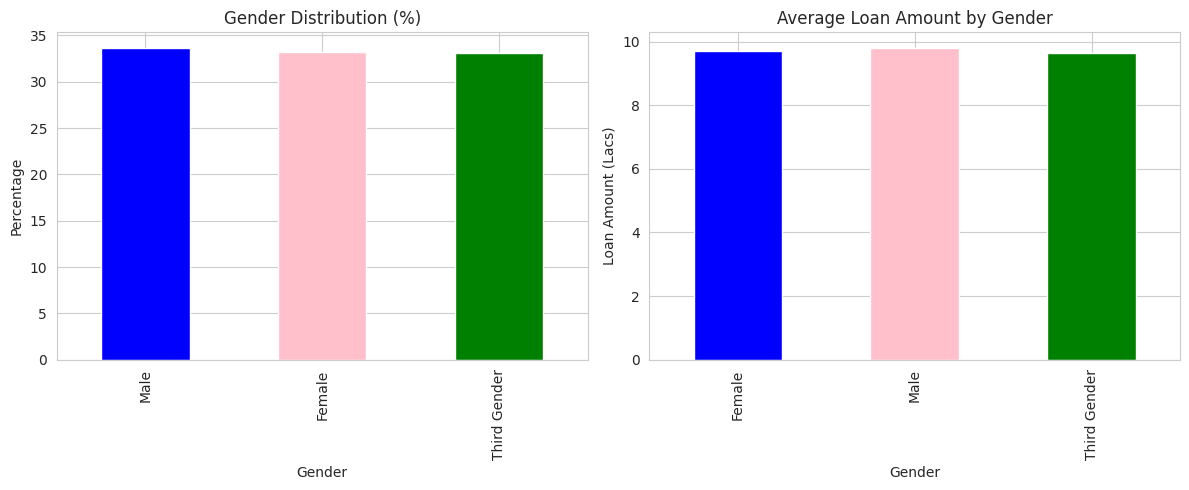

In [ ]:
# 1. Gender Analysis
gender_counts = df['Gender'].value_counts(normalize=True) * 100
gender_loan_avg = df.groupby('Gender')['Applied Loan Amount in Lacs'].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar', color=['blue', 'pink', 'green'])
plt.title('Gender Distribution (%)')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
gender_loan_avg.plot(kind='bar', color=['blue', 'pink', 'green'])
plt.title('Average Loan Amount by Gender')
plt.ylabel('Loan Amount (Lacs)')
plt.tight_layout()
plt.show()


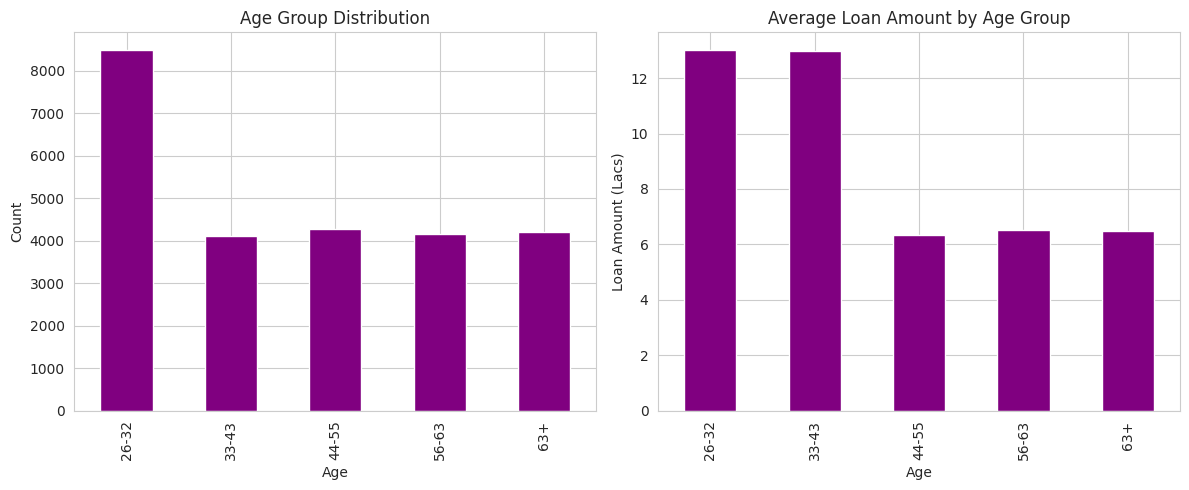

In [ ]:

# 2. Age Group Analysis
age_order = ['26-32', '33-43', '44-55', '56-63', '63+']
age_counts = df['Age'].value_counts().reindex(age_order)
age_loan_avg = df.groupby('Age')['Applied Loan Amount in Lacs'].mean().reindex(age_order)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
age_counts.plot(kind='bar', color='purple')
plt.title('Age Group Distribution')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
age_loan_avg.plot(kind='bar', color='purple')
plt.title('Average Loan Amount by Age Group')
plt.ylabel('Loan Amount (Lacs)')
plt.tight_layout()
plt.show()



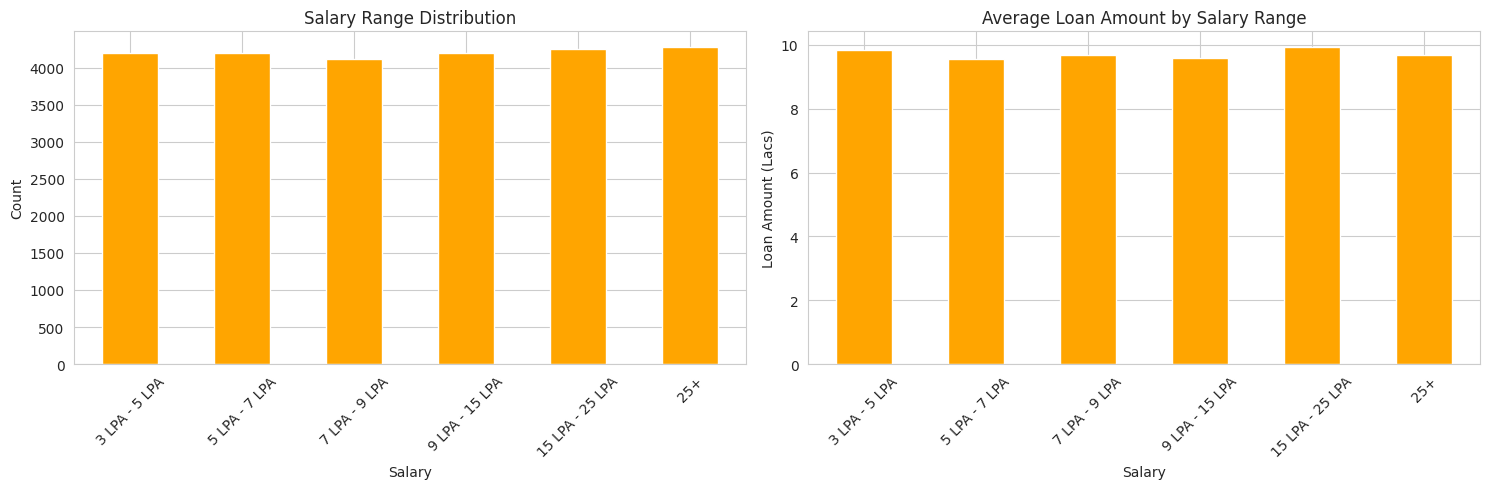

In [ ]:
# 3. Salary Range Analysis
salary_order = ['3 LPA - 5 LPA', '5 LPA - 7 LPA', '7 LPA - 9 LPA',
                '9 LPA - 15 LPA', '15 LPA - 25 LPA', '25+']
salary_counts = df['Salary'].value_counts().reindex(salary_order)
salary_loan_avg = df.groupby('Salary')['Applied Loan Amount in Lacs'].mean().reindex(salary_order)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
salary_counts.plot(kind='bar', color='orange')
plt.title('Salary Range Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
salary_loan_avg.plot(kind='bar', color='orange')
plt.title('Average Loan Amount by Salary Range')
plt.ylabel('Loan Amount (Lacs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



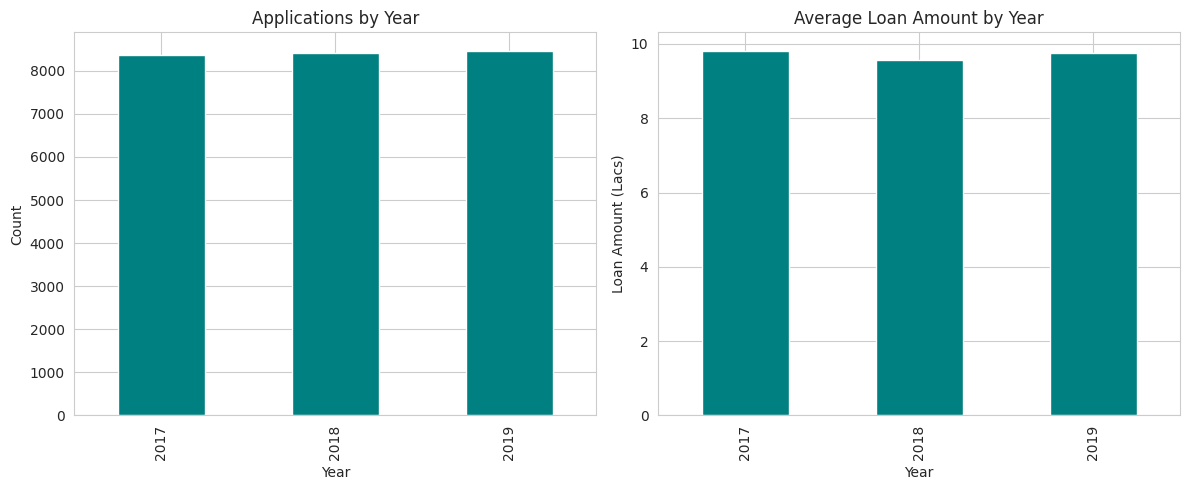

In [ ]:
# 4. Temporal Analysis by Year
df['Year'] = df['Fin Year']
year_counts = df['Year'].value_counts().sort_index()
year_loan_avg = df.groupby('Year')['Applied Loan Amount in Lacs'].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
year_counts.plot(kind='bar', color='teal')
plt.title('Applications by Year')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
year_loan_avg.plot(kind='bar', color='teal')
plt.title('Average Loan Amount by Year')
plt.ylabel('Loan Amount (Lacs)')
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

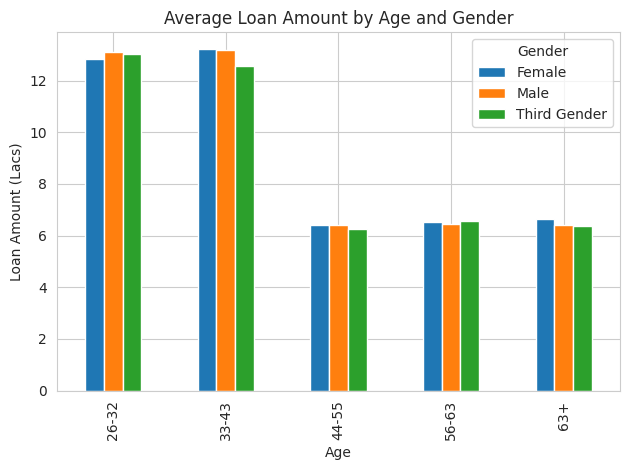

In [ ]:
# 5. Combined Analysis: Gender vs Age vs Loan Amount
cross_table = pd.pivot_table(df, values='Applied Loan Amount in Lacs',
                            index='Age', columns='Gender', aggfunc='mean')
cross_table = cross_table.reindex(age_order)

plt.figure(figsize=(10, 6))
cross_table.plot(kind='bar')
plt.title('Average Loan Amount by Age and Gender')
plt.ylabel('Loan Amount (Lacs)')
plt.tight_layout()
plt.show()



In [ ]:
# Generate summary statistics
print("\nSummary Statistics:")
print(df['Applied Loan Amount in Lacs'].describe())

# Correlation between numeric features
numeric_df = df[['Applied Loan Amount in Lacs', 'Month', 'Fin Year', 'Channel Id', 'Product Id', 'Branch Code']]
print("\nCorrelation Matrix:")
print(numeric_df.corr())


Summary Statistics:
count    25236.000000
mean         9.717507
std          6.374872
min          1.000000
25%          4.000000
50%          8.000000
75%         14.000000
max         24.000000
Name: Applied Loan Amount in Lacs, dtype: float64

Correlation Matrix:
                             Applied Loan Amount in Lacs     Month  Fin Year  \
Applied Loan Amount in Lacs                     1.000000  0.005281 -0.003802   
Month                                           0.005281  1.000000 -0.006406   
Fin Year                                       -0.003802 -0.006406  1.000000   
Channel Id                                     -0.044822 -0.011245  0.005915   
Product Id                                     -0.004056  0.010553  0.009266   
Branch Code                                     0.000428  0.012927 -0.003525   

                             Channel Id  Product Id  Branch Code  
Applied Loan Amount in Lacs   -0.044822   -0.004056     0.000428  
Month                         -0.0112

In [ ]:
# 1. Find overall highest average loan segment
segment_analysis = df.groupby(['Salary', 'Age', 'Gender'])['Applied Loan Amount in Lacs'] \
                    .agg(['mean', 'count']).reset_index() \
                    .sort_values('mean', ascending=False)

print("Top 5 segments by average loan amount:")
print(segment_analysis.head(5).to_string(index=False))

Top 5 segments by average loan amount:
         Salary   Age       Gender      mean  count
  3 LPA - 5 LPA 33-43         Male 14.027523    218
15 LPA - 25 LPA 33-43         Male 13.789474    228
            25+ 33-43       Female 13.678571    224
 9 LPA - 15 LPA 26-32 Third Gender 13.508929    448
            25+ 26-32         Male 13.502041    490


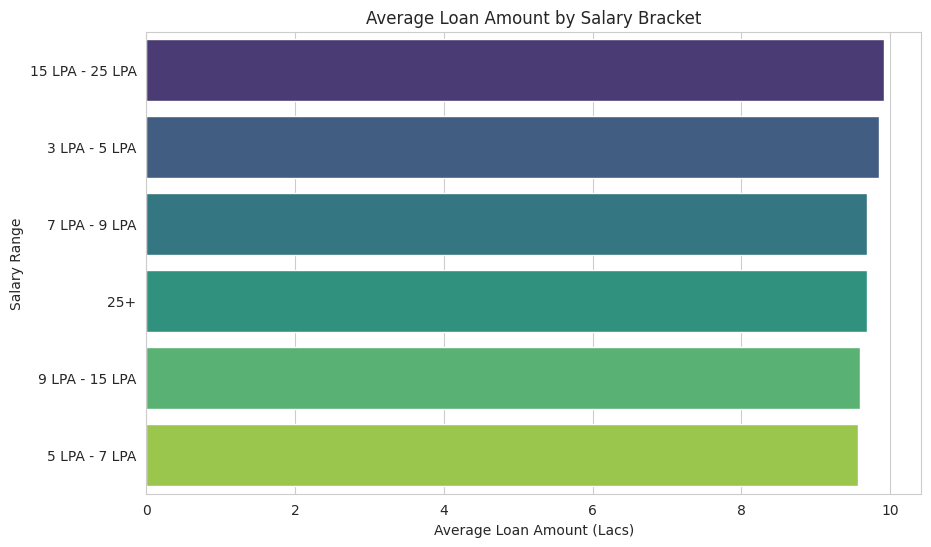

In [ ]:
# 2. Visualize top salary brackets
plt.figure(figsize=(10, 6))
salary_loan = df.groupby('Salary')['Applied Loan Amount in Lacs'].mean().sort_values(ascending=False)
sns.barplot(x=salary_loan.values, y=salary_loan.index, palette='viridis')
plt.title('Average Loan Amount by Salary Bracket')
plt.xlabel('Average Loan Amount (Lacs)')
plt.ylabel('Salary Range')
plt.show()

In [ ]:

# 3. Drill down into the 25+ LPA segment
high_income = df[df['Salary'] == '25+']

# 3a. By gender
gender_breakdown = high_income.groupby('Gender')['Applied Loan Amount in Lacs'] \
                    .agg(['mean', 'count'])
print("\n25+ LPA segment by gender:")
print(gender_breakdown)

# 3b. By age
age_breakdown = high_income.groupby('Age')['Applied Loan Amount in Lacs'] \
                    .agg(['mean', 'count']).reindex(['26-32', '33-43', '44-55', '56-63', '63+'])
print("\n25+ LPA segment by age:")
print(age_breakdown)




25+ LPA segment by gender:
                  mean  count
Gender                       
Female        9.614195   1423
Male          9.864605   1455
Third Gender  9.561290   1395

25+ LPA segment by age:
            mean  count
Age                    
26-32  13.029223   1403
33-43  13.108538    691
44-55   6.316062    772
56-63   6.483607    732
63+     6.556213    676


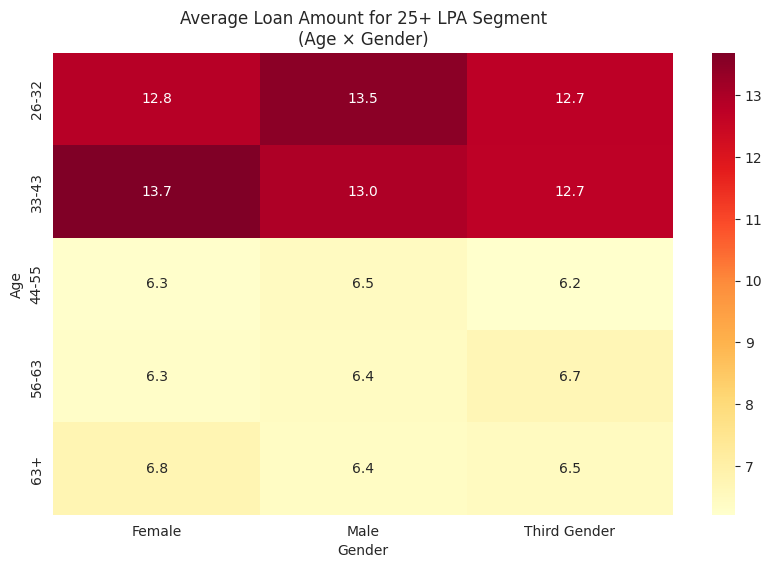

In [ ]:
# 4. Combined segmentation analysis
top_segment = high_income.groupby(['Age', 'Gender'])['Applied Loan Amount in Lacs'] \
                    .mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(top_segment, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Average Loan Amount for 25+ LPA Segment\n(Age × Gender)')
plt.show()


In [ ]:

# 5. Compare with other segments
comparison = df.groupby(['Salary'])['Applied Loan Amount in Lacs'] \
             .agg(['mean', 'count']).sort_values('mean', ascending=False)
print("\nLoan amount comparison across all salary brackets:")
print(comparison)


Loan amount comparison across all salary brackets:
                     mean  count
Salary                          
15 LPA - 25 LPA  9.924559   4255
3 LPA - 5 LPA    9.845751   4201
7 LPA - 9 LPA    9.686513   4115
25+              9.684605   4274
9 LPA - 15 LPA   9.593236   4199
5 LPA - 7 LPA    9.567271   4192


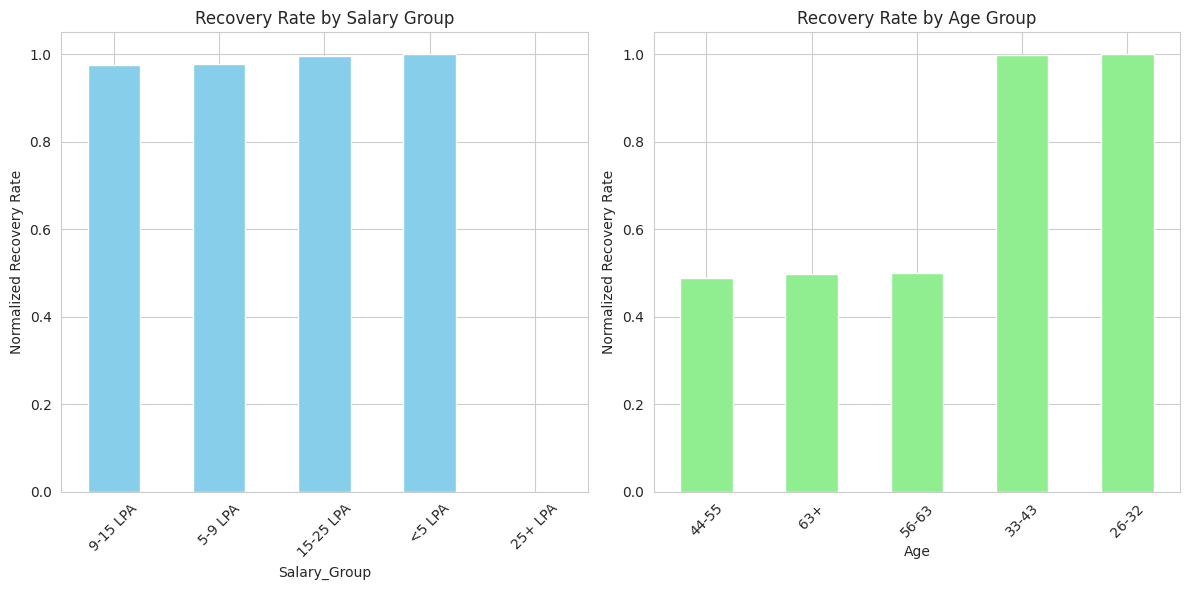

Recovery Rates by Salary Group:
              count  recovery_rate
Salary_Group                      
9-15 LPA       4199       0.974309
5-9 LPA        8307       0.977671
15-25 LPA      8528       0.995768
<5 LPA         4200       1.000000
25+ LPA           0            NaN

Recovery Rates by Age Group:
       count  recovery_rate
Age                        
44-55   4270       0.488018
63+     4201       0.498395
56-63   4160       0.500589
33-43   4122       0.998878
26-32   8481       1.000000


In [ ]:
# Convert salary to numeric ranges for analysis
def salary_to_numeric(salary):
    if salary == '25+':
        return 25
    elif 'LPA' in salary:
        low, high = salary.split(' LPA - ')
        high = high.split(' LPA')[0]
        return (float(low) + float(high)) / 2
    return 0

df['Salary_Mid'] = df['Salary'].apply(salary_to_numeric)

# Create salary groups
salary_bins = [0, 5, 9, 15, 25, float('inf')]
salary_labels = ['<5 LPA', '5-9 LPA', '9-15 LPA', '15-25 LPA', '25+ LPA']
df['Salary_Group'] = pd.cut(df['Salary_Mid'], bins=salary_bins, labels=salary_labels)

# Analyze by salary group
salary_recovery = df.groupby('Salary_Group')['Applied Loan Amount in Lacs'].agg(['count', 'mean', 'median'])
salary_recovery['recovery_rate'] = salary_recovery['mean'] / salary_recovery['mean'].max()

# Analyze by age group
age_recovery = df.groupby('Age')['Applied Loan Amount in Lacs'].agg(['count', 'mean', 'median'])
age_recovery['recovery_rate'] = age_recovery['mean'] / age_recovery['mean'].max()

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
salary_recovery['recovery_rate'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Recovery Rate by Salary Group')
plt.ylabel('Normalized Recovery Rate')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
age_recovery['recovery_rate'].sort_values().plot(kind='bar', color='lightgreen')
plt.title('Recovery Rate by Age Group')
plt.ylabel('Normalized Recovery Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print results
print("Recovery Rates by Salary Group:")
print(salary_recovery[['count', 'recovery_rate']].sort_values('recovery_rate'))

print("\nRecovery Rates by Age Group:")
print(age_recovery[['count', 'recovery_rate']].sort_values('recovery_rate'))

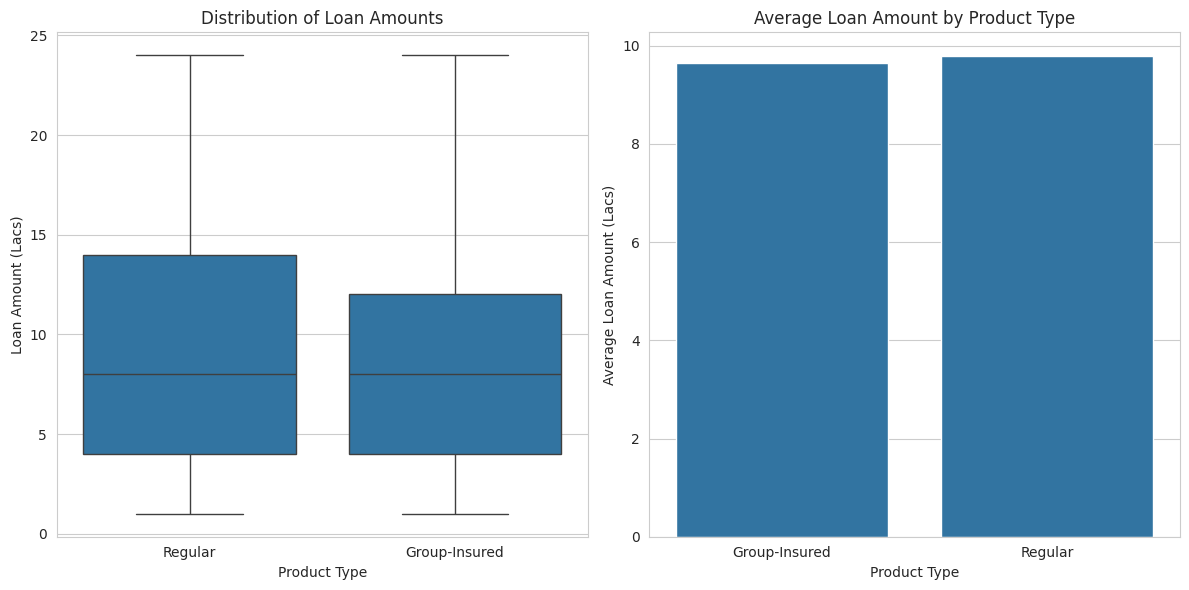

Recovery Performance Comparison:
               count      mean  median  recovery_rate
Product_Type                                         
Group-Insured  12695  9.651516     8.0       0.986399
Regular        12539  9.784592     8.0       1.000000

Statistical Test Results:
T-test p-value: 0.0973
Cohen's d effect size: -0.02

Conclusion: No statistically significant difference in recovery rates


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
df = pd.read_excel('homeloan-financedata.xlsx', sheet_name='Customer')

# Clean the data
df = df.dropna(subset=['Applied Loan Amount in Lacs', 'Product Id'])

# Classify products - assuming:
# Product ID 1 & 2 = Regular loans
# Product ID 3 & 4 = Group-insured products
df['Product_Type'] = np.where(df['Product Id'].isin([3, 4]), 'Group-Insured', 'Regular')

# Calculate recovery rates (using loan amount as proxy for recovery)
recovery_analysis = df.groupby('Product_Type')['Applied Loan Amount in Lacs'].agg(
    ['count', 'mean', 'median', 'std']
)
recovery_analysis['recovery_rate'] = recovery_analysis['mean'] / recovery_analysis['mean'].max()

# Visualization
plt.figure(figsize=(12, 6))

# Plot 1: Comparison of loan amounts
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Product_Type', y='Applied Loan Amount in Lacs')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Product Type')
plt.ylabel('Loan Amount (Lacs)')

# Plot 2: Mean recovery comparison
plt.subplot(1, 2, 2)
sns.barplot(data=recovery_analysis.reset_index(), x='Product_Type', y='mean')
plt.title('Average Loan Amount by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Loan Amount (Lacs)')

plt.tight_layout()
plt.show()

# Statistical testing
regular_loans = df[df['Product_Type'] == 'Regular']['Applied Loan Amount in Lacs']
group_insured = df[df['Product_Type'] == 'Group-Insured']['Applied Loan Amount in Lacs']

# T-test for difference in means
t_stat, p_value = stats.ttest_ind(regular_loans, group_insured, equal_var=False)

# Effect size calculation
cohens_d = (group_insured.mean() - regular_loans.mean()) / np.sqrt(
    (group_insured.std()**2 + regular_loans.std()**2) / 2
)

# Print results
print("Recovery Performance Comparison:")
print(recovery_analysis[['count', 'mean', 'median', 'recovery_rate']])

print("\nStatistical Test Results:")
print(f"T-test p-value: {p_value:.4f}")
print(f"Cohen's d effect size: {cohens_d:.2f}")

if p_value < 0.05:
    print("\nConclusion: There is a statistically significant difference in recovery rates")
    if cohens_d > 0:
        print("Group-insured products have BETTER recovery rates")
    else:
        print("Regular loans have BETTER recovery rates")
else:
    print("\nConclusion: No statistically significant difference in recovery rates")

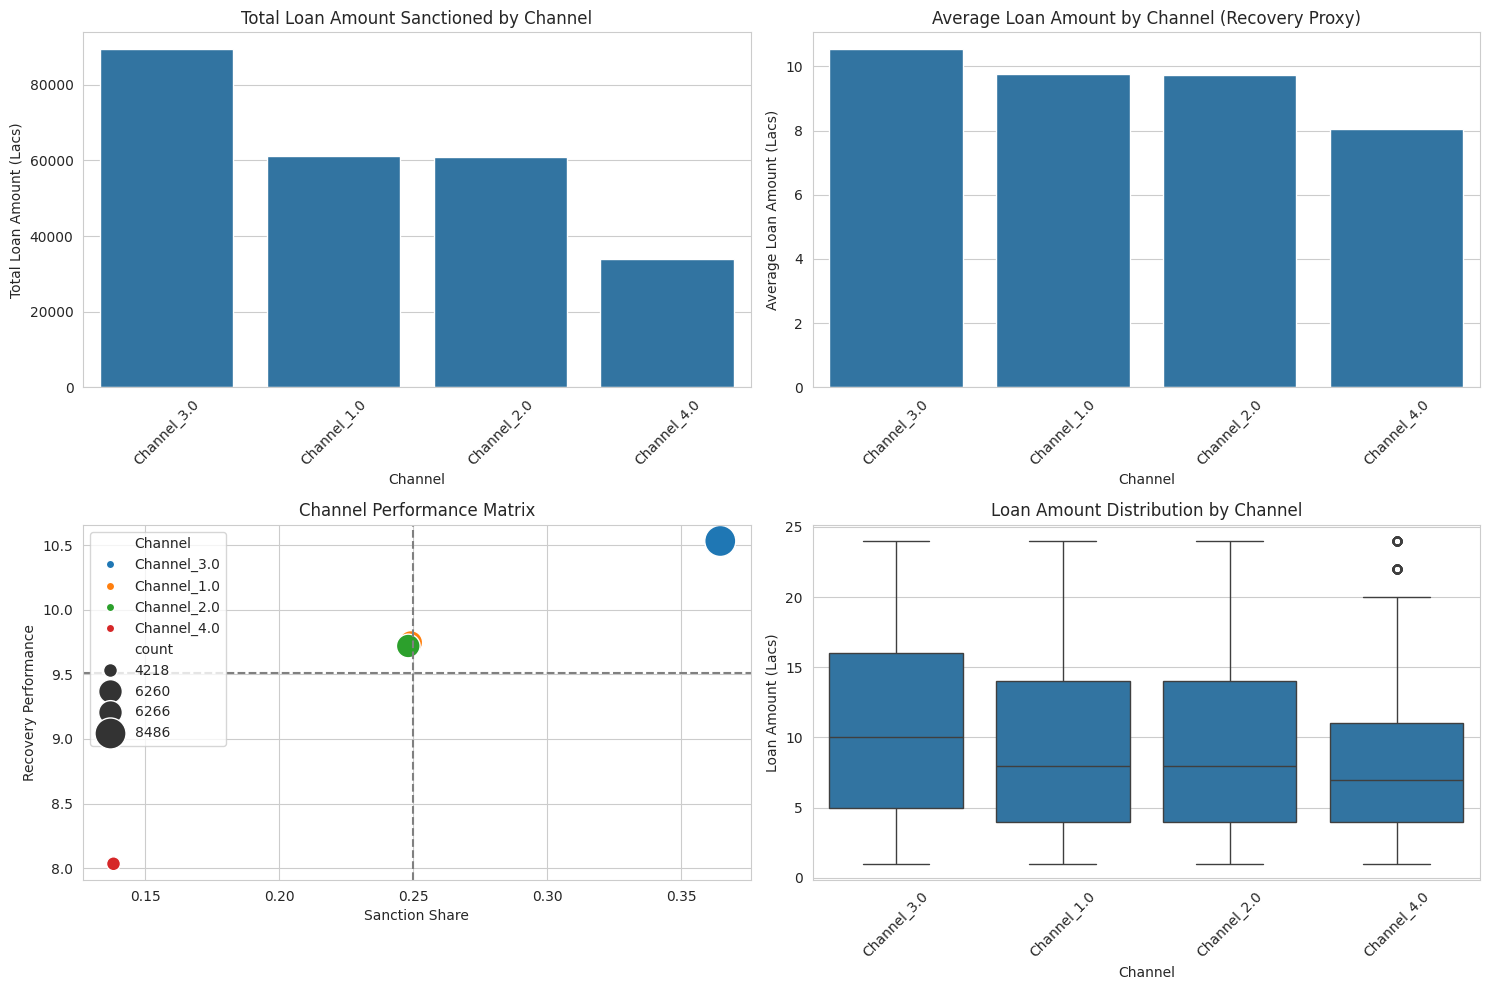


Channel Performance Summary:
             count       mean  median      sum       std  sanction_share  \
Channel                                                                    
Channel_3.0   8486  10.532406    10.0  89378.0  6.669101        0.364539   
Channel_1.0   6266   9.746728     8.0  61073.0  6.419308        0.249094   
Channel_2.0   6260   9.719489     8.0  60844.0  6.359992        0.248160   
Channel_4.0   4218   8.033665     7.0  33886.0  5.314336        0.138208   

             recovery_mean  recovery_median  composite_score  
Channel                                                       
Channel_3.0      10.532406             10.0         3.839471  
Channel_1.0       9.746728              8.0         2.427847  
Channel_2.0       9.719489              8.0         2.411984  
Channel_4.0       8.033665              7.0         1.110318  

ANOVA p-value: 0.0000

Significant differences exist between channels. Performing post-hoc analysis...
     Multiple Comparison of Mea

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load and clean data
df = pd.read_excel('homeloan-financedata.xlsx', sheet_name='Customer')
df = df.dropna(subset=['Applied Loan Amount in Lacs', 'Channel Id'])

# Convert Channel Id to categorical
df['Channel'] = 'Channel_' + df['Channel Id'].astype(str)

# 1. Sanction Performance Analysis (loan amounts)
sanction_stats = df.groupby('Channel')['Applied Loan Amount in Lacs'].agg(
    ['count', 'mean', 'median', 'sum', 'std']
).sort_values('mean', ascending=False)
sanction_stats['sanction_share'] = sanction_stats['sum'] / sanction_stats['sum'].sum()

# 2. Recovery Performance Analysis (using loan amount as proxy)
# Assuming higher loan amounts indicate better recovery potential
recovery_stats = df.groupby('Channel')['Applied Loan Amount in Lacs'].agg(
    ['mean', 'median']
).sort_values('mean', ascending=False)
recovery_stats.columns = ['recovery_mean', 'recovery_median']

# Combine metrics
channel_performance = pd.concat([sanction_stats, recovery_stats], axis=1)
channel_performance['composite_score'] = (
    channel_performance['sanction_share'] * channel_performance['recovery_mean']
)

# Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Sanction performance by channel
plt.subplot(2, 2, 1)
sns.barplot(data=sanction_stats.reset_index(),
            x='Channel', y='sum',
            order=sanction_stats.sort_values('sum', ascending=False).index)
plt.title('Total Loan Amount Sanctioned by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Loan Amount (Lacs)')
plt.xticks(rotation=45)

# Plot 2: Recovery performance by channel
plt.subplot(2, 2, 2)
sns.barplot(data=recovery_stats.reset_index(),
            x='Channel', y='recovery_mean',
            order=recovery_stats.sort_values('recovery_mean', ascending=False).index)
plt.title('Average Loan Amount by Channel (Recovery Proxy)')
plt.xlabel('Channel')
plt.ylabel('Average Loan Amount (Lacs)')
plt.xticks(rotation=45)

# Plot 3: Channel comparison matrix
plt.subplot(2, 2, 3)
sns.scatterplot(data=channel_performance,
                x='sanction_share', y='recovery_mean',
                size='count', hue='Channel', sizes=(100, 500))
plt.title('Channel Performance Matrix')
plt.xlabel('Sanction Share')
plt.ylabel('Recovery Performance')
plt.axvline(channel_performance['sanction_share'].mean(), linestyle='--', color='gray')
plt.axhline(channel_performance['recovery_mean'].mean(), linestyle='--', color='gray')

# Plot 4: Distribution by channel
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Channel', y='Applied Loan Amount in Lacs',
            order=channel_performance.sort_values('recovery_mean', ascending=False).index)
plt.title('Loan Amount Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Loan Amount (Lacs)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistical Analysis
print("\nChannel Performance Summary:")
print(channel_performance.sort_values('composite_score', ascending=False))

# ANOVA test for differences between channels
f_stat, p_value = stats.f_oneway(
    *[group['Applied Loan Amount in Lacs']
     for name, group in df.groupby('Channel')]
)

print(f"\nANOVA p-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nSignificant differences exist between channels. Performing post-hoc analysis...")
    # Tukey's HSD test
    tukey = pairwise_tukeyhsd(
        endog=df['Applied Loan Amount in Lacs'],
        groups=df['Channel'],
        alpha=0.05
    )
    print(tukey.summary())
else:
    print("\nNo statistically significant differences between channels")

# Dominance analysis
dominant_channel = channel_performance['composite_score'].idxmax()
dominance_score = channel_performance.loc[dominant_channel, 'composite_score']
next_best_score = channel_performance['composite_score'].nlargest(2).iloc[-1]

print(f"\nDominance Analysis:")
print(f"Top performing channel: {dominant_channel}")
print(f"Dominance score: {dominance_score:.2f}")
print(f"Next best channel score: {next_best_score:.2f}")
print(f"Dominance ratio: {dominance_score/next_best_score:.2f}x")